# 1. Business undestanding

Our study is based on the Stackoverflow’s 2017 annual developer survey.
The objectif is to show that it's possible to do coding by answeing to below questions :

1. Do we need to follow big study to do coding ?
2. Only men can code ?
3. Do we only have to be in the office to code ?

# 2. Data undestanding

### a. Accessing to data

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset and display sampl of data
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Understanding the survey's questions
df_fields = pd.read_csv('survey_results_schema.csv')
df_fields.head(153)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
...,...,...
148,SurveyLong,This survey was too long
149,QuestionsInteresting,The questions were interesting
150,QuestionsConfusing,The questions were confusing
151,InterestedAnswers,I'm interested in learning how other developer...


### b. Display the size of the dataset

In [4]:
# Here we are defining our function displaying the size of the dataset
def displaySizeDataset(dataset):
    """
    Display a sentence regarding the size of the dataset.
 
    Args:
        dataset (datafame): The dataset we are using.
 
    Returns:
        No return value. Just displaying the size of our dataset like a sentence.
    """
    num_rows = dataset.shape[0]
    num_features = dataset.shape[1]
    print('Our dataset has ' + str(num_rows) + ' rows and ' + str(num_features) + ' features.')

In [5]:
# Get the number of rows and columns by calling our function "displaySizeDataset()"
displaySizeDataset(df)

Our dataset has 51392 rows and 154 features.


### c. Exploring data

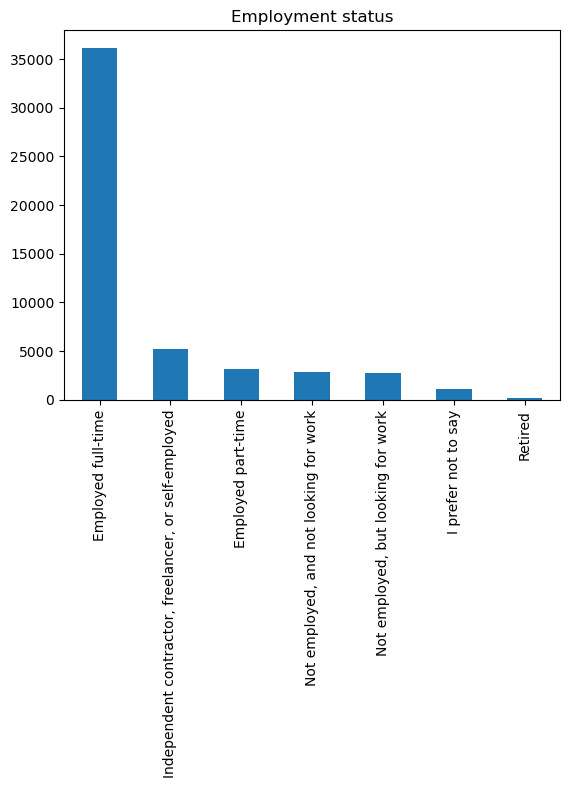

In [6]:
# To check thecredibility of this survey based the 
stat_employment = df.EmploymentStatus.value_counts()
(stat_employment).plot(kind="bar");
plt.title("Employment status");

In [7]:
# Describe our dataset
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [8]:
# List all columns
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [9]:
# Unique values for each columns
df.nunique()

Respondent              51392
Professional                5
ProgramHobby                4
Country                   201
University                  4
                        ...  
QuestionsInteresting        5
QuestionsConfusing          5
InterestedAnswers           5
Salary                   3049
ExpectedSalary            685
Length: 154, dtype: int64

In [10]:
# Unique values for 'Gender'
df['Gender'].unique()

array(['Male', nan, 'Female', 'Gender non-conforming', 'Other',
       'Male; Gender non-conforming', 'Female; Transgender',
       'Male; Female', 'Male; Other', 'Transgender',
       'Transgender; Gender non-conforming',
       'Female; Gender non-conforming',
       'Male; Female; Transgender; Gender non-conforming; Other',
       'Male; Female; Transgender', 'Male; Female; Other',
       'Male; Female; Transgender; Gender non-conforming',
       'Male; Transgender', 'Female; Transgender; Gender non-conforming',
       'Gender non-conforming; Other',
       'Male; Female; Gender non-conforming', 'Female; Other',
       'Male; Transgender; Gender non-conforming', 'Transgender; Other',
       'Male; Gender non-conforming; Other',
       'Female; Gender non-conforming; Other',
       'Male; Female; Gender non-conforming; Other',
       'Female; Transgender; Other',
       'Female; Transgender; Gender non-conforming; Other',
       'Male; Transgender; Other', 'Male; Female; Transgender;

# 3. Data preparation (Wrangling and Cleaning)

### a. Remove duplicates rows (if present)

In [11]:
# We will first try to remove all duplicates rows that can lead to incorrect analysis/insights.
df.drop_duplicates()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51388,51389,Student,No,Venezuela,"Yes, full-time",Employed full-time,Master's degree,Computer programming or Web development,Never,100 to 499 employees,...,NaN,Male,A master's degree,Black or of African descent; Hispanic or Latin...,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
51389,51390,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...","Less than half the time, but at least one day ...",10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


### b. Check if we have missing values

In [12]:
# We can see the presence of the value "True", meaning that there is missing values
df.isnull()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
51388,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
51389,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
51390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [13]:
# We can see how many missing values on each column
df.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

### c. Drop rows where all columns have missing values

In [14]:
# We decide to remove rows where all columns have missing values to avoid useless rows to be part of our statistic.
df.dropna(how='all', axis=0, inplace=True)

In [15]:
displaySizeDataset(df)

Our dataset has 51392 rows and 154 features.


In [16]:
# This above result show that the size of the dataset didn't change, meaning that there is no row having missing values on all columns.

### d. For each targeted columns, removing rows having missing value

In [17]:
# We decide to drop missing values for the 3 columns that we are targetting to study because for these cases imputing values will biais our results
df_HomeRemote_Case = df.dropna(subset=['HomeRemote'], axis=0)
displaySizeDataset(df_HomeRemote_Case)

df_FormalEducation_Case = df.dropna(subset=['FormalEducation'], axis=0)
displaySizeDataset(df_FormalEducation_Case)

df_Gender_Case = df.dropna(subset=['Gender'], axis=0)
displaySizeDataset(df_Gender_Case)

Our dataset has 44008 rows and 154 features.
Our dataset has 51392 rows and 154 features.
Our dataset has 35047 rows and 154 features.


# 4. Answering to our questions 

###  a. (PART I) Do we need to follow big study to do coding ?

Many people have fear to start this domain sayng that its difficult and they don't have enough basic knowledges, time, or money to follow big studies.

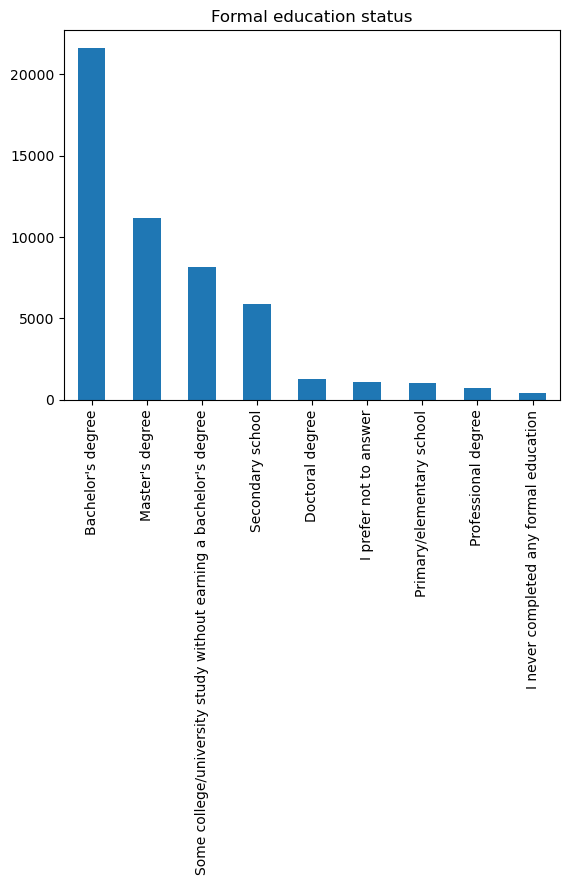

In [18]:
stat_formaleducaton = df_FormalEducation_Case.FormalEducation.value_counts()
(stat_formaleducaton).plot(kind="bar");
plt.title("Formal education status");

According to th above figure, we can see that even people with elementary education are coding.
Others haven't even finished any formal education.
So, no need to do big study to do coding.

###  b. (PART II) Only men can code ?

There is a stereotype that certain fields are made for men and that coding is one of them.

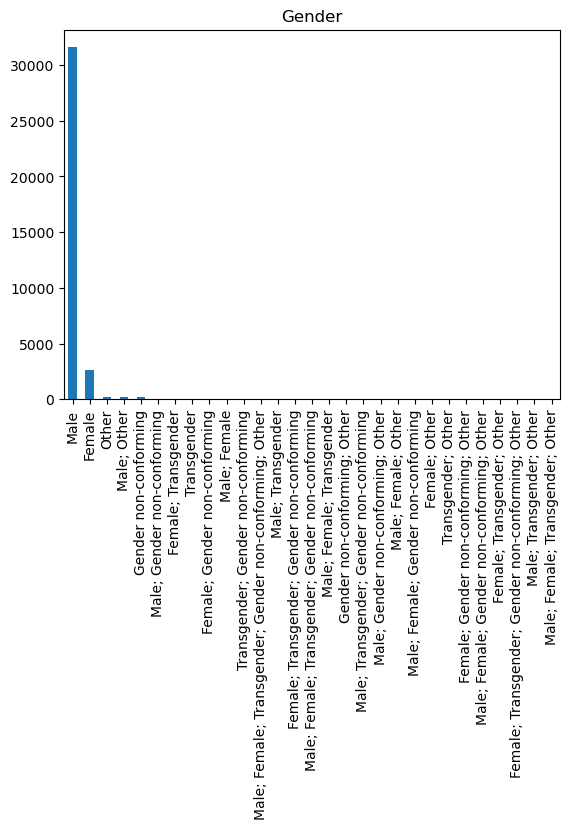

In [19]:
stat_gender = df_Gender_Case.Gender.value_counts()
stat_gender.plot(kind="bar");
plt.title("Gender");

This survey shows us that whatever your gender, coding is open and accessing to every body.

###  c. (PART III) Do we only have to be in the office to code ?

After the passage of the Covid, now people are checking how a domain is resilient to international crisis.

In [20]:
df.groupby(['HomeRemote']).mean()['HoursPerWeek'].sort_values()

C:\Users\pkowa\AppData\Local\Temp\ipykernel_1968\3169138195.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['HomeRemote']).mean()['HoursPerWeek'].sort_values()


HomeRemote
It's complicated                                           2.592838
Never                                                      3.294249
A few days each month                                      3.295040
Less than half the time, but at least one day each week    3.411154
All or almost all the time (I'm full-time remote)          4.504069
More than half, but not all, the time                      4.882688
About half the time                                        4.951187
Name: HoursPerWeek, dtype: float64

We can see here that it's possible to choose where you want to work, at the office or at home (home, distant city, distant country, etc.)
This flexibility is not given to all sectors ! 
Coding has this advantage even if there is a negative point, teleworking agents spend more time working than those who are in the office because the start, break and end times of work are not respected by many employers thinking that agents are not working enough.
This is why, despite this flexibility, many people still prefer to work in the office to avoid prejudices.